# Linear Regression model
---

> A computer program is said to learn from experience $E$ with respect to some class of tasks $T$ and performance measure $P$, if its performance at tasks in $T$, as measured by $P$, improves with experience $E$. Hence, 

$$ E = Experience; $$
$$T = Task; $$
$$P = Performance Measure$$

### Supervised Learning
> We are given a labelled data set and hence, we already know what our correct output should look like, having the idea that there is a relationship between the input and the output. That relationship is essential to our algorithm as we look implement a linear regression model in Python.

- <b> Regression </b> 
<br/>Predict results within a continuous output.

- <b> Classification </b>
<br/>Predict results in a discrete output.

### Unsupervised Learning
> We derive a structure from data where we don't necessarily know the effect of the variables. This structure is derived by clustering the data based on relationships among the variables in the data.

### Model Representation
Let $x^{(i)}$ denote input and $y^{(i)}$ denote output. Such an ordered pair $(x^{(i)}, y^{(i)})$ is called a training example. Our goal is, given a training set, which contains numerous such training examples, to learn a function $h_{\theta} : X → Y$, where $\theta$ is a parameter or set of parameters determined, so that $h(x)$ is a "good" predictor for the corresponding value of $y$. This function $h_{\theta}$ is called a hypothesis.


### Cost Function
The accuracy of hypothesis function is measured using a **cost function**. A cost function is a measure of how much error we are incurring by predicting a value using our hypothesis function, measured against the label in the dataset. This function is basically a squared error function or a mean squared error function.

$Hypothesis:$
$h_{\theta}(x) = \theta_{0} + \theta_{1}x\\$

$Parameters:$
$\theta_{0}, \theta_{1}\\ \\$

$Cost \hspace{3px} Function:$
$J(\theta_{0}, \theta_{1}) = \frac{1}{2m}\sum_{i=1}^{m} (h_{\theta}(x_{i})-y_{i})^{2}\\$

$Goal:$
$minimize \hspace{3px} J(\theta_{0}, \theta_{1})$<br/>

The mean is halved by introducing a factor of $2$, as a convenience for the computation of the gradient descent, as the derivative term of the square function will cancel out the $\frac{1}{2}$ term.

### Gradient Descent
The idea of gradient descent is to iteratively reduce the value of cost function, hence moving in the direction of decresing error, or more formally, moving iteratively in the direction of steepest gradient of the cost functions. <p>The gradient descent algorithm we use is given below, which is repeated untill it converges to minima:

$\theta_{j} := \theta_{j} - \alpha \frac{\partial}{\partial \theta_{j}} J(\theta_{0}, \theta_{1})$

Here, $\alpha$ is known as **learning rate** which determines the size of each step. The learning rate $\alpha$ is a parameter defining how fast we intend to converge to the minima of the cost function. But a certain and unavoidable tradeoff is involved. A high learning rate, though leads to faster convergence to a value, but is associated with an efficient model. On the other hand, a very small learning rate, though trains an excellent predictive model, but takes large number of iterations to converge to minima. This trade-off has to be kept in mind while determining the learning rate.<p> 
The direction of the step taken is determined by the partial derivative of $J(\theta_{0}, \theta_{1})$. Depending on the starting point, one can end up at different points. At each iteration, one should simultaneously update the parameters $\theta_{0}, \theta_{1}, \theta_{2}, ... ,\theta_{n}$

Example:

$temp0 := \theta_{0} - \alpha \frac{\partial}{\partial \theta_{0}} J(\theta_{0}, \theta_{1})$<br/>
$temp1 := \theta_{1} - \alpha \frac{\partial}{\partial \theta_{1}} J(\theta_{0}, \theta_{1})$<br/>

$\theta_{0} := temp0\\$<br/>
$\theta_{1} := temp1\\$

$\frac{\partial}{\partial \theta_{j}} J(\theta_{0}, \theta_{1}) = \frac{\partial}{\partial \theta_{j}}[\frac{1}{2m}\sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})]$

$j = 0: \frac{\partial}{\partial \theta_{0}} J(\theta_{0}, \theta_{1}) = \frac{1}{m}\sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})$<br/>
$j = 1: \frac{\partial}{\partial \theta_{1}} J(\theta_{0}, \theta_{1}) = \frac{1}{m}\sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)}) x^{(i)}$

### Linear Regression using Gradient Descent in Python

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

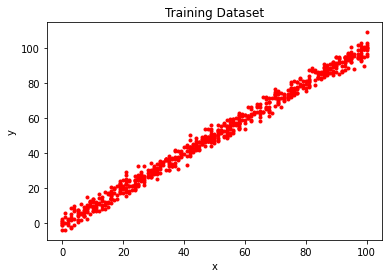

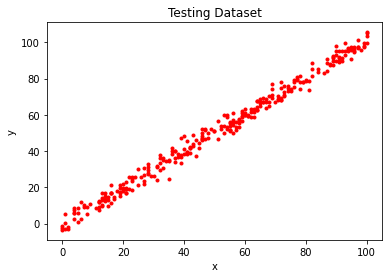

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
dataset = list(zip(train.x, train.y))
testData = list(zip(test.x,test.y))
for i in dataset: plt.plot(i[0], i[1], 'r.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Dataset')
plt.show()
for i in testData: plt.plot(i[0],i[1],'r. ')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Testing Dataset')
plt.show()

In [3]:
learning_rate = 0.000001
steps = 100000

O0 = -2.0
O1 = 1.0

def hypothesis(O0, O1, x):
    return O0+(x*O1)

def J0(O0, O1, x, y):
    S = 0.0
    N = 700
    for i in range(N):
        S+=((hypothesis(O0, O1, x[i])-y[i]))

    return (1/N)*(S)

def J1(O0, O1, x, y):
    S = 0.0
    N = 700
    for i in range(N):
        S+=(((hypothesis(O0, O1, x[i])-y[i]))*x[i])

    return (1/N)*(S)

while (steps):
    temp0 = O0-(learning_rate*J0(O0, O1, list(train.x), list(train.y)))
    temp1 = O1-(learning_rate*J1(O0, O1, list(train.x), list(train.y)))
    O0 = temp0
    O1 = temp1
    steps -= 1

print(O0, O1)

-1.9530418151059845 1.0282511756687693


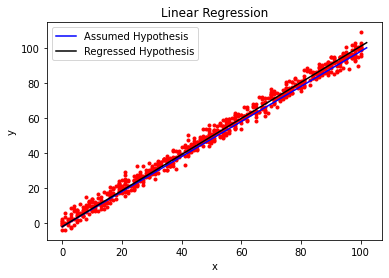

In [4]:
x = np.array([0.0 ,50.0,102.0])
y = O0+O1*x
yi = -2.0+1.0*x                              # the initial values of parameters
for i in dataset: plt.plot(i[0], i[1], 'r.')
plt.plot(x, yi, 'b', label='Assumed Hypothesis')
plt.plot(x, y, 'k', label='Regressed Hypothesis')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

Testing hypothesis after regression

In [5]:
def Jt(O0,O1,x,y):
    S = 0.0
    N = 300
    for j in range(N):
        S+=(hypothesis(O0,O1,x[j])-y[j])**2

    return (S/N)
    
costFinal = Jt(O0,O1,list(test.x),list(test.y))
costInitial = Jt(-2.0,1.0,list(test.x),list(test.y))

print(costFinal,costInitial)

9.933261378606403 14.476268759572735
